<a href="https://colab.research.google.com/github/Jauny143/Machine-Learning-Projects/blob/main/Salary_pridiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the required library
[Data_Set](https://www.kaggle.com/rohankayan/years-of-experience-and-salary-dataset)

In [1]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

#Load Data Set

In [2]:
df =pd.read_csv('Salary_Data.csv')

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.sample(10)

,YearsExperience,Salary
27,9.6,112635.0
20,6.8,91738.0
3,2.0,43525.0
23,8.2,113812.0
21,7.1,98273.0
25,9.0,105582.0
8,3.2,64445.0
6,3.0,60150.0
13,4.1,57081.0
26,9.5,116969.0


In [5]:
df.shape

(30, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [7]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


#Visualization

Text(0.5, 1.0, 'Years of experience vs Salary')

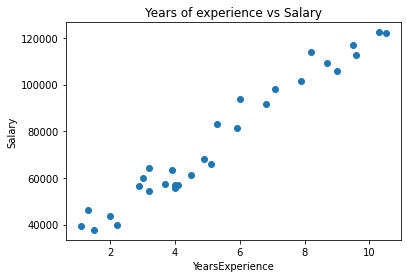

In [8]:
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Years of experience vs Salary')

#Data Cleaning

In [9]:
df.shape

(30, 2)

In [10]:
df1 = df.drop_duplicates()

In [11]:
 df1.shape

(30, 2)

#Check the null values in the dataset

In [12]:
df1.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [13]:
X = df1.iloc[:,:-1].values
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [14]:
y = df1.iloc[:,-1].values
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=51)

In [16]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
y_pred = reg.predict(X_test)
y_pred

array([107193.59760834,  55668.48562384,  39742.54191954, 102509.49651884,
        55668.48562384, 115624.97956944])

In [18]:
y_test

array([109431.,  64445.,  37731., 113812.,  54445., 112635.])

In [19]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[107193.59760834 109431.        ]
 [ 55668.48562384  64445.        ]
 [ 39742.54191954  37731.        ]
 [102509.49651884 113812.        ]
 [ 55668.48562384  54445.        ]
 [115624.97956944 112635.        ]]


In [20]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9608624689052039